# Assignment 3

In this assinment I have taken a Kaggle Image dataset to study and understadn how a Deep Learning CNN(Convolutional Neural Network) works, and can be operated on the images using TesorFlow and TensorBoard.
The Kaggle image dataset being used in here is a Pokemon Image dataset taken from the below source for your humble reference.
##### Pokemon Image Dataset - https://www.kaggle.com/aaronyin/oneshotpokemon#kaggle-one-shot-pokemon.zip

<img src="Images/pokemon.png" width="700">

We majorly use Keras which has been set over the platform of TesorFlow. Keras helps us play with the images by understanding it and manipulating it as per our requirement as we need to re-adjust the images which are our primary source of dataset to adjust with the training module of our TesorFlow to operate on it.

#### Dataset description:
There are three directories, 
"pokemon-a" and "pokemon-b" are standard pokemon images with no background. One can use them for training. 
"pokemon-tcg-images" are pokemon images cropped from pokemon tcg card. They are for testing. 
Filenames in all directories start with pokemon-id, aka class label.

#### Where those images from:
All images are collected from internet, and original authors owns the copyright (Nintendo, I guess). 
Check links below for more information:

* <a href="https://www.kaggle.com/kvpratama/pokemon-images-dataset">kaggle-pokemon-images</a>

* <a href="https://veekun.com/dex/downloads">veekun</a>

* <a href="https://github.com/PokemonTCG">pokemon-tcg</a>


Keras is a high-level python API which can be used to quickly build and train neural networks using either Tensorflow or Theano as back-end.

Before we start wit hCNN in Deep learning, lets discuss about RNN and its drawbacks.

The Regular Neural Netowrks(NN) is not capable of dealing with images. Just imagine each pixel is connected to one neuron and there will thousands of neurons which will be computationally expensive. CNN handles images in different ways, but still it follows the general concept of NN.

<img src="Images/image1.jpeg">

They are made up of neurons that have learnable weights and biases. Each neuron accepts the inputs, action a dot product operation and follows the non-linearity function. And they still have a loss function (e.g. SVM/Softmax) on the fully-connected layer and all the tips & tricks we developed for learning regular NN still apply.

CNN is used as the default model for anything to deal with images. Nowadays there are papers that has mentioned about the use of Recurrent Neural Network(RNN) for the image recognition. Traditionally RNNs are being used for text and speech recognition.

We try the below scenarios for our models that has been created in the whole notebook:
##### * Part A - Have used a Convolution for the CNN that has been established further

##### * Part B - Activation function
    * Model 1 - Created with ReLU and explained
    * Model 2 - Created with TanH and explained
    * Model 3 - Created with Softsign and explained

##### * Part C - Cost function
    * Model 4 - Created with Cross-Entropy as an activation function and explained by running it for 10 Epoch
    * Model 5 - Created with Quadratic cost (mean-square error) activation function and implemented with Adam as an optimization and explained

##### * Part D - Epochs
    * Model 1 being the best till the run, is taken to test if the number of Epoch helps it improve the training with explanation

##### * Part E - Gradient estimation   
    * Model 6 - Created with Adadelta as an optimization technique and explained
    * Model 7 - Created with Adagrad as an optimization technique and explained
##### * Part F - Network Architecture
    * Model 8 - Network is reduced from the usual one's taken in the previous models and checked in performance
    * Model 9 - Network increased with 3 layers in total and checked with performance
##### * Part G - Network initialization
    * Model 10 - Xavier Uniform network initialization being applied and checked
    * Model 11 - Zero network initialization being applied and checked

At the end as a conclusion:
#### Conclusion:
We compare the performance of the models generated will now based on their Accuracy metric and try to check which one performs good. Also, we try to save the model, apply the same on a real world test data to check how it performs. We check the accurace of the same and come to conclusion with leraning how to perfrom a Deep Learning algortihm CNN during the process.


## `Part A` - Deep Learning with CNN

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import TensorBoard
import pickle
import time


gpu_options = tf.GPUOptions(per_process_gpu_memory_fraction=0.333)
sess = tf.Session(config=tf.ConfigProto(gpu_options=gpu_options))

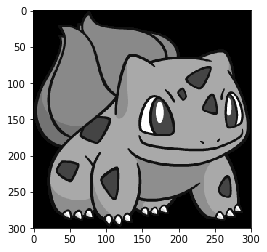

In [2]:
DATADIR = "kaggle-one-shot-pokemon/"

CATEGORIES = ["pokemon-a", "pokemon-b"]

for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more!

In [3]:
print(img_array.shape)

(300, 300)


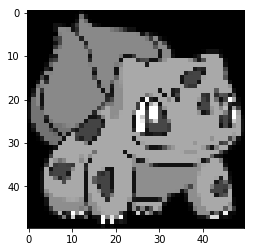

In [4]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

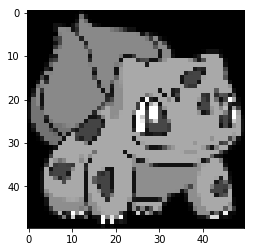

In [5]:
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [41]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                pass

create_training_data()

print(len(training_data))

100%|████████████████████████████████████████████████████████████████████████████████| 819/819 [00:13<00:00, 60.87it/s]


1758


In [7]:
import random

random.shuffle(training_data)

In [8]:
for sample in training_data[:10]:
    print(sample[1])

1
0
0
0
1
1
0
0
1
0


In [42]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))

X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

[[[[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  ...

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]

  [[0]
   [0]
   [0]
   ...
   [0]
   [0]
   [0]]]]


### How many input neurons do I have?

What is the input layer for the Pokemon data? Each image is 

    $50x50 = 2500$.

In [10]:
X.shape

(1758, 50, 50, 1)

In [11]:
50*50

2500

#### We save the evaluation using pickle as a TEXT based out for future reference.

In [12]:
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [13]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

We define a mode generation function to cut the cookie cutter and use the for generating the models based on our requirements as and when it comes for a specific activation function, loss, optimization techniques.

#### Function `function_model` - generates the model based on the parameters given to it
* `activation` - the name of the activation function that needs to be used
* `loss_name` - Loss to be used(Cost function)
* `opti` - optimization technique that needs to be used.

In [31]:
count=1

In [38]:
def function_model(activation, loss_name, opti):
    global count
    global tensorboard
    NAME = "Pokemon-model{}-{}".format(count, int(time.time()))
    tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))
    
    model = Sequential()
    
    # Conv2D in Convelution for a 2D image
    #3x3 in the window we are using
    model.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
    model.add(Activation(activation))
    #We do the pooling as size 2x2
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #We do it again, but dont need shapping
    model.add(Conv2D(64, (3, 3)))
    model.add(Activation(activation))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #Convolution is 2D so we flatten the data to compress it to understandable
    model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
    
    model.add(Dense(64))
    model.add(Activation(activation))
    
    model.add(Dense(1))
    model.add(Activation('sigmoid'))
    
    model.compile(loss=loss_name,
                  optimizer=opti,
                  metrics=['accuracy'])
    return model
#     model1.fit(X, y, batch_size=32, epochs=epoc_num, validation_split=0.3, callbacks=[tensorboard])
    count+=1

In [39]:
model_x=function_model('relu', 'binary_crossentropy', 'adam')

#### A trial to generate the model

In [40]:
model_x.fit(X, y, batch_size=32, epochs=5, validation_split=0.3, callbacks=[tensorboard])

Train on 1230 samples, validate on 528 samples
Epoch 1/5
1230/1230 [==============================] - ETA: 58s - loss: 0.6944 - acc: 0.53 - ETA: 31s - loss: 0.6529 - acc: 0.68 - ETA: 22s - loss: 0.5812 - acc: 0.75 - ETA: 18s - loss: 0.5156 - acc: 0.79 - ETA: 15s - loss: 0.4597 - acc: 0.83 - ETA: 13s - loss: 0.4121 - acc: 0.85 - ETA: 12s - loss: 0.4118 - acc: 0.86 - ETA: 11s - loss: 0.3803 - acc: 0.87 - ETA: 10s - loss: 0.3692 - acc: 0.88 - ETA: 9s - loss: 0.3711 - acc: 0.8750 - ETA: 8s - loss: 0.3531 - acc: 0.880 - ETA: 8s - loss: 0.3396 - acc: 0.882 - ETA: 7s - loss: 0.3256 - acc: 0.889 - ETA: 7s - loss: 0.3169 - acc: 0.890 - ETA: 6s - loss: 0.3110 - acc: 0.889 - ETA: 6s - loss: 0.3051 - acc: 0.890 - ETA: 6s - loss: 0.2953 - acc: 0.891 - ETA: 5s - loss: 0.3036 - acc: 0.888 - ETA: 5s - loss: 0.2944 - acc: 0.894 - ETA: 4s - loss: 0.3047 - acc: 0.884 - ETA: 4s - loss: 0.2985 - acc: 0.885 - ETA: 4s - loss: 0.2922 - acc: 0.889 - ETA: 4s - loss: 0.3019 - acc: 0.888 - ETA: 3s - loss: 0.2997 

Before we start Convolution, lets explain about it a bit

## Convolution
Let’s dive into how convolution layer works. Convolution has got set learn-able filters which will be a matrix(width, height, and depth). We consider an image as a matrix and filter will be sliding through the image matrix as shown below to get the convoluted image which is the filtered image of the actual image.

<img src="Images/gif_image.gif">

Depend upon the task, more than one filter is available in the model to cater the different features. Feature might be looking for a cat, looking for color etc. Filter matrix value is learned during the training phase of the model.

<img src='Images/gif_2.gif'>

## `Part B` - Activation functions
In computational networks, the activation function of a node defines the output of that node given an input or set of inputs. A standard computer chip circuit can be seen as a digital network of activation functions that can be “ON” (1) or “OFF” (0), depending on input. This is similar to the behavior of the linear perceptron in neural networks. However, only nonlinear activation functions allow such networks to compute nontrivial problems using only a small number of nodes. In artificial neural networks this function is also called the transfer function.

##### We use ReLU, TanH & Softsign to demonstrate it

#### 1. Rectified linear unit (ReLU) transfer function

Rectified linear unit (ReLU)

Activation identity

$f(x)=x$
$f'(x)=1$
$(-\infty,\infty)$
$C^\infty$

$f(x) = \begin{cases}
    0 &amp; \text{for } x &lt; 0\\
    x &amp; \text{for } x \ge 0\end{cases}$

$f'(x) = \begin{cases}
    0 &amp; \text{for } x &lt; 0\\
    1 &amp; \text{for } x \ge 0\end{cases}$

$[0,\infty)$
$C^0$

### Model 1 - CNN 
With below conditions
* <span class="mark">ReLU</span> 
* CrossEntropy 
* 5 Epoch

In [14]:
X = X/255.0

NAME = "Pokemon-model1-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

model1 = Sequential()

# Conv2D in Convelution for a 2D image
#3x3 in the window we are using
model1.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model1.add(Activation('relu'))
#We do the pooling as size 2x2
model1.add(MaxPooling2D(pool_size=(2, 2)))

#We do it again, but dont need shapping
model1.add(Conv2D(64, (3, 3)))
model1.add(Activation('relu'))
model1.add(MaxPooling2D(pool_size=(2, 2)))

#Convolution is 2D so we flatten the data to compress it to understandable
model1.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model1.add(Dense(64))
model1.add(Activation('relu'))

model1.add(Dense(1))
model1.add(Activation('sigmoid'))

model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model1.fit(X, y, batch_size=32, epochs=5, validation_split=0.3, callbacks=[tensorboard])

Instructions for updating:
Colocations handled automatically by placer.
Train on 1230 samples, validate on 528 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
1230/1230 [==============================] - ETA: 16s - loss: 0.6923 - acc: 0.46 - ETA: 9s - loss: 0.7463 - acc: 0.4062 - ETA: 7s - loss: 0.6945 - acc: 0.479 - ETA: 5s - loss: 0.6592 - acc: 0.609 - ETA: 5s - loss: 0.6314 - acc: 0.662 - ETA: 4s - loss: 0.6070 - acc: 0.697 - ETA: 4s - loss: 0.5719 - acc: 0.732 - ETA: 3s - loss: 0.5532 - acc: 0.742 - ETA: 3s - loss: 0.5349 - acc: 0.753 - ETA: 3s - loss: 0.5200 - acc: 0.768 - ETA: 3s - loss: 0.4998 - acc: 0.778 - ETA: 3s - loss: 0.4774 - acc: 0.789 - ETA: 2s - loss: 0.4779 - acc: 0.790 - ETA: 2s - loss: 0.4622 - acc: 0.792 - ETA: 2s - loss: 0.4870 - acc: 0.772 - ETA: 2s - loss: 0.4698 - acc: 0.781 - ETA: 2s - loss: 0.4479 - acc: 0.790 - ETA: 2s - loss: 0.4340 - acc: 0.800 - ETA: 2s - loss: 0.4354 - acc: 0.805 - ETA: 1s - loss: 0.4515 - acc: 0.810 - ETA: 1s - loss: 0

#### TensorFlow out put for accuracy

<img src="./Images/TensorBoard/epoch_acc_model1.svg?sanitize=true" width="500"/>

As see, the `acuracy` increases slowly, even though it started from a good value of 0.85 it plateaus after 3. Mostly we can see how it performed with a higher Epoch

### TanH

$f(x)=\tanh(x)=\frac{2}{1+e^{-2x}}-1$
$f'(x)=1-f(x)^2$
$(-1,1)$
$C^\infty$

##### The Hyperbolic Tangent Activation Function

Though the logistic sigmoid has a nice biological interpretation, it turns out that the logistic sigmoid can cause a neural network to get “stuck” during training. This is due in part to the fact that if a strongly-negative input is provided to the logistic sigmoid, it outputs values very near zero. Since neural networks use the feed-forward activations to calculate parameter gradients (again, see this previous post for details), this can result in model parameters that are updated less regularly than we would like, and are thus “stuck” in their current state.

An alternative to the logistic sigmoid is the hyperbolic tangent, or tanh function:

<img src="Images/tanh.png" width="400">

##### Cross Entropy

Cross-Entropy
Cross-entropy loss, or log loss, measures the performance of a classification model whose output is a probability value between 0 and 1. Cross-entropy loss increases as the predicted probability diverges from the actual label. So predicting a probability of .012 when the actual observation label is 1 would be bad and result in a high loss value. A perfect model would have a log loss of 0.

### Model 2 - CNN
With below conditions
* <span class="mark">TanH</span>
* CrossEntropy
* 5 Epoch

In [15]:
model2 = Sequential()

NAME = "Pokemon-model2-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))


model2.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model2.add(Activation('tanh'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Conv2D(256, (3, 3)))
model2.add(Activation('tanh'))
model2.add(MaxPooling2D(pool_size=(2, 2)))

model2.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model2.add(Dense(64))
model2.add(Activation('tanh'))

model2.add(Dense(1))
model2.add(Activation('sigmoid'))

model2.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model2.fit(X, y, batch_size=32, epochs=5, validation_split=0.3, callbacks=[tensorboard])

Train on 1230 samples, validate on 528 samples
Epoch 1/5
1230/1230 [==============================] - ETA: 41s - loss: 0.6978 - acc: 0.53 - ETA: 32s - loss: 1.3796 - acc: 0.53 - ETA: 29s - loss: 2.8218 - acc: 0.48 - ETA: 27s - loss: 3.2507 - acc: 0.50 - ETA: 25s - loss: 3.5030 - acc: 0.50 - ETA: 24s - loss: 3.6667 - acc: 0.51 - ETA: 23s - loss: 3.8220 - acc: 0.50 - ETA: 22s - loss: 3.9346 - acc: 0.50 - ETA: 21s - loss: 3.9535 - acc: 0.51 - ETA: 20s - loss: 3.9659 - acc: 0.51 - ETA: 20s - loss: 4.0261 - acc: 0.51 - ETA: 19s - loss: 4.0018 - acc: 0.52 - ETA: 18s - loss: 4.0889 - acc: 0.51 - ETA: 17s - loss: 4.1003 - acc: 0.51 - ETA: 16s - loss: 4.0894 - acc: 0.52 - ETA: 16s - loss: 4.1328 - acc: 0.51 - ETA: 15s - loss: 4.1016 - acc: 0.52 - ETA: 14s - loss: 4.0724 - acc: 0.52 - ETA: 13s - loss: 4.0880 - acc: 0.52 - ETA: 13s - loss: 4.0869 - acc: 0.52 - ETA: 12s - loss: 4.0844 - acc: 0.52 - ETA: 11s - loss: 4.0565 - acc: 0.52 - ETA: 10s - loss: 4.0875 - acc: 0.52 - ETA: 10s - loss: 4.1253 

#### TensorFlow out put for accuracy

<img src="Images/TensorBoard/epoch_acc_model2.svg?sanitize=true" width="500">

Seems the model doesn't perfrom good using the tanh activation function. It starts from a very low `accuracy` of 0.54 and increases slowly after an Epoch of 3. That's the conclusion for this model 2

### Model 3 - CNN - <span class="mark">Softsign</span> - CrossEntropy - 5 Epoch

##### Softsign function: 

$y = x / (1 + |x|)$

In [16]:
model3 = Sequential()

NAME = "Pokemon-model3-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))


model3.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model3.add(Activation('softsign'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Conv2D(256, (3, 3)))
model3.add(Activation('softsign'))
model3.add(MaxPooling2D(pool_size=(2, 2)))

model3.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model3.add(Dense(64))
model3.add(Activation('softsign'))

model3.add(Dense(1))
model3.add(Activation('sigmoid'))

model3.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model3.fit(X, y, batch_size=32, epochs=5, validation_split=0.3, callbacks=[tensorboard])

Train on 1230 samples, validate on 528 samples
Epoch 1/5
1230/1230 [==============================] - ETA: 40s - loss: 0.6863 - acc: 0.62 - ETA: 32s - loss: 1.1585 - acc: 0.57 - ETA: 29s - loss: 2.0871 - acc: 0.55 - ETA: 27s - loss: 2.6814 - acc: 0.51 - ETA: 25s - loss: 2.2101 - acc: 0.58 - ETA: 24s - loss: 2.0334 - acc: 0.62 - ETA: 23s - loss: 1.7999 - acc: 0.66 - ETA: 22s - loss: 1.6745 - acc: 0.69 - ETA: 21s - loss: 1.5355 - acc: 0.72 - ETA: 20s - loss: 1.4182 - acc: 0.74 - ETA: 20s - loss: 1.3616 - acc: 0.74 - ETA: 19s - loss: 1.2905 - acc: 0.74 - ETA: 18s - loss: 1.2419 - acc: 0.73 - ETA: 17s - loss: 1.1709 - acc: 0.74 - ETA: 16s - loss: 1.1014 - acc: 0.76 - ETA: 16s - loss: 1.0603 - acc: 0.76 - ETA: 15s - loss: 1.0163 - acc: 0.77 - ETA: 14s - loss: 0.9801 - acc: 0.77 - ETA: 13s - loss: 0.9423 - acc: 0.78 - ETA: 13s - loss: 0.9101 - acc: 0.79 - ETA: 12s - loss: 0.8765 - acc: 0.79 - ETA: 11s - loss: 0.8478 - acc: 0.80 - ETA: 11s - loss: 0.8297 - acc: 0.80 - ETA: 10s - loss: 0.8132 

#### TensorFlow out put for accuracy

<img src="Images/TensorBoard/epoch_acc_model3.svg?sanitize=true" width="500">

Softsign helps get a good accuracy at the beginning, but plateaus later as it goes.

#### Now, lets compare Model1,Model2,Model3 based on the activation function given:

<img src="Images/TensorBoard/epoch_acc_activation.svg?sanitize=true" width="500">

#### Seems, `Model1` turns our to be the best in model accuracy. We can show a comparision based on the validation test done on the validation images as shown below with max accuracy at 

<img src="Images/comparision_value.jpg">

## `Part C` - Cost Function

Now, as we had already used one of the Cost function to show case its performance, which was `CrossEntropy`, we now try to run it for more Epochs to check its performance

### Model 4 - CNN - Softsign - CrossEntropy - <span class="mark">10 Epoch</span>

In [17]:
model4 = Sequential()

NAME = "Pokemon-model4-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))


model4.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model4.add(Activation('softsign'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Conv2D(256, (3, 3)))
model4.add(Activation('softsign'))
model4.add(MaxPooling2D(pool_size=(2, 2)))

model4.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model4.add(Dense(64))
model4.add(Activation('softsign'))

model4.add(Dense(1))
model4.add(Activation('sigmoid'))

model4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model4.fit(X, y, batch_size=32, epochs=10, validation_split=0.3, callbacks=[tensorboard])

Train on 1230 samples, validate on 528 samples
Epoch 1/10
1230/1230 [==============================] - ETA: 39s - loss: 0.6895 - acc: 0.65 - ETA: 32s - loss: 1.4516 - acc: 0.57 - ETA: 29s - loss: 2.0310 - acc: 0.57 - ETA: 27s - loss: 2.3549 - acc: 0.57 - ETA: 25s - loss: 2.2934 - acc: 0.58 - ETA: 24s - loss: 2.0005 - acc: 0.63 - ETA: 23s - loss: 1.8942 - acc: 0.64 - ETA: 22s - loss: 1.6966 - acc: 0.68 - ETA: 21s - loss: 1.5442 - acc: 0.70 - ETA: 20s - loss: 1.4347 - acc: 0.70 - ETA: 20s - loss: 1.3432 - acc: 0.70 - ETA: 19s - loss: 1.2582 - acc: 0.72 - ETA: 18s - loss: 1.1857 - acc: 0.73 - ETA: 17s - loss: 1.1184 - acc: 0.74 - ETA: 16s - loss: 1.0704 - acc: 0.75 - ETA: 16s - loss: 1.0177 - acc: 0.76 - ETA: 15s - loss: 0.9643 - acc: 0.77 - ETA: 14s - loss: 0.9228 - acc: 0.78 - ETA: 13s - loss: 0.9007 - acc: 0.78 - ETA: 13s - loss: 0.8837 - acc: 0.78 - ETA: 12s - loss: 0.8538 - acc: 0.78 - ETA: 11s - loss: 0.8300 - acc: 0.79 - ETA: 11s - loss: 0.8089 - acc: 0.79 - ETA: 10s - loss: 0.7793

#### TensorFlow out put for accuracy

<img src="Images/TensorBoard/epoch_acc_model4.svg?sanitize=true" width="500">


Thus, seems model 4 as well gives a good prediction accuracy for our model running for 10 Epoch on `binary_crossentropy`. As it goes, it plateaus with the accuracy

### Model 5 - CNN - Softsign - <span class="mark">QuadraticCost</span> - 10 Epoch - <span class="mark">Adam</span>

### Quadratic Cost Function:

If there is diminishing return to the variable factor the cost function becomes quadratic. With this we even performed a optimization called `Adam` to check with the performance

###### `Adam` is different to classical stochastic gradient descent.

Stochastic gradient descent maintains a single learning rate (termed alpha) for all weight updates and the learning rate does not change during training.

A learning rate is maintained for each network weight (parameter) and separately adapted as learning unfolds.

In [18]:
model5 = Sequential()

NAME = "Pokemon-model5-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))


model5.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model5.add(Activation('softsign'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Conv2D(256, (3, 3)))
model5.add(Activation('softsign'))
model5.add(MaxPooling2D(pool_size=(2, 2)))

model5.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model5.add(Dense(64))
model5.add(Activation('softsign'))

model5.add(Dense(1))
model5.add(Activation('sigmoid'))

model5.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['accuracy'])

model5.fit(X, y, batch_size=32, epochs=10, validation_split=0.3, callbacks=[tensorboard])

Instructions for updating:
Use tf.cast instead.
Train on 1230 samples, validate on 528 samples
Epoch 1/10
1230/1230 [==============================] - ETA: 36s - loss: 0.2459 - acc: 0.68 - ETA: 30s - loss: 0.3311 - acc: 0.59 - ETA: 27s - loss: 0.4141 - acc: 0.53 - ETA: 26s - loss: 0.4264 - acc: 0.53 - ETA: 24s - loss: 0.4293 - acc: 0.53 - ETA: 24s - loss: 0.3835 - acc: 0.58 - ETA: 23s - loss: 0.3480 - acc: 0.62 - ETA: 22s - loss: 0.3198 - acc: 0.64 - ETA: 21s - loss: 0.2879 - acc: 0.68 - ETA: 20s - loss: 0.2716 - acc: 0.70 - ETA: 19s - loss: 0.2581 - acc: 0.71 - ETA: 18s - loss: 0.2440 - acc: 0.73 - ETA: 18s - loss: 0.2351 - acc: 0.74 - ETA: 17s - loss: 0.2265 - acc: 0.75 - ETA: 16s - loss: 0.2175 - acc: 0.76 - ETA: 15s - loss: 0.2083 - acc: 0.76 - ETA: 15s - loss: 0.1999 - acc: 0.77 - ETA: 14s - loss: 0.1949 - acc: 0.78 - ETA: 13s - loss: 0.1846 - acc: 0.79 - ETA: 13s - loss: 0.1863 - acc: 0.79 - ETA: 12s - loss: 0.1831 - acc: 0.79 - ETA: 11s - loss: 0.1811 - acc: 0.80 - ETA: 10s - lo

Epoch 6/10
1230/1230 [==============================] - ETA: 26s - loss: 0.0667 - acc: 0.93 - ETA: 25s - loss: 0.0612 - acc: 0.92 - ETA: 24s - loss: 0.0429 - acc: 0.94 - ETA: 23s - loss: 0.0570 - acc: 0.92 - ETA: 23s - loss: 0.0516 - acc: 0.93 - ETA: 22s - loss: 0.0577 - acc: 0.92 - ETA: 21s - loss: 0.0662 - acc: 0.91 - ETA: 21s - loss: 0.0583 - acc: 0.92 - ETA: 20s - loss: 0.0529 - acc: 0.93 - ETA: 19s - loss: 0.0608 - acc: 0.92 - ETA: 19s - loss: 0.0627 - acc: 0.92 - ETA: 18s - loss: 0.0656 - acc: 0.91 - ETA: 17s - loss: 0.0694 - acc: 0.91 - ETA: 16s - loss: 0.0688 - acc: 0.91 - ETA: 16s - loss: 0.0665 - acc: 0.91 - ETA: 15s - loss: 0.0634 - acc: 0.91 - ETA: 14s - loss: 0.0644 - acc: 0.91 - ETA: 14s - loss: 0.0627 - acc: 0.92 - ETA: 13s - loss: 0.0646 - acc: 0.91 - ETA: 12s - loss: 0.0661 - acc: 0.91 - ETA: 12s - loss: 0.0645 - acc: 0.91 - ETA: 11s - loss: 0.0649 - acc: 0.91 - ETA: 10s - loss: 0.0649 - acc: 0.91 - ETA: 10s - loss: 0.0635 - acc: 0.91 - ETA: 9s - loss: 0.0612 - acc: 0.

TensorFlow output for the accuracy

<img src="Images/TensorBoard/epoch_acc_model5.svg?sanitize=true" width="500">

Similar to the other best models as above, the accuracy starts at a good point, and then increases and then plateaus and then decreases slightly and then seems to increase for a given Epoch.

Now, lets compare the model generated for the Cost Function - Model4 & Model5

<img src="Images/TensorBoard/epoch_acc_cost_func.svg?sanitize=true" width="500">

The models are almost similar in having the same accuracy, the only difference slightly would be at the Epoch of 4 where the `QuadraticCost` reduces the accuracy of the model slightly

<img src="Images/comparision_2.jpg">

## `Part D` - Epochs

We use the best model that has been run till now, and it turns out to be `Model1` as it has been used with `ReLLU` which usually is the best Activation function that turned out to be for our image dataset. We take the same model which was run for 5 Epochs and run it further for `10 Epochs` to see its performance.

### Model1 again with  - <span class="mark">Epoch 10</span>

In [21]:
NAME = "Pokemon-model1-EPOCH10-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

model1.fit(X, y, batch_size=32, epochs=10, validation_split=0.3, callbacks=[tensorboard])

Train on 1230 samples, validate on 528 samples
Epoch 1/10
1230/1230 [==============================] - ETA: 2s - loss: 0.0861 - acc: 0.968 - ETA: 2s - loss: 0.1078 - acc: 0.953 - ETA: 2s - loss: 0.0930 - acc: 0.968 - ETA: 2s - loss: 0.1133 - acc: 0.960 - ETA: 2s - loss: 0.1378 - acc: 0.950 - ETA: 2s - loss: 0.1533 - acc: 0.947 - ETA: 2s - loss: 0.1561 - acc: 0.950 - ETA: 2s - loss: 0.1530 - acc: 0.953 - ETA: 2s - loss: 0.1420 - acc: 0.954 - ETA: 2s - loss: 0.1350 - acc: 0.956 - ETA: 2s - loss: 0.1505 - acc: 0.946 - ETA: 2s - loss: 0.1424 - acc: 0.947 - ETA: 2s - loss: 0.1366 - acc: 0.951 - ETA: 2s - loss: 0.1366 - acc: 0.950 - ETA: 2s - loss: 0.1336 - acc: 0.954 - ETA: 2s - loss: 0.1357 - acc: 0.951 - ETA: 1s - loss: 0.1322 - acc: 0.952 - ETA: 1s - loss: 0.1288 - acc: 0.953 - ETA: 1s - loss: 0.1345 - acc: 0.950 - ETA: 1s - loss: 0.1469 - acc: 0.948 - ETA: 1s - loss: 0.1428 - acc: 0.949 - ETA: 1s - loss: 0.1377 - acc: 0.951 - ETA: 1s - loss: 0.1332 - acc: 0.953 - ETA: 1s - loss: 0.1305 

Based on the run, TensorBoard output for the accuracy was as below, which is good:

<img src="Images/image2.jpg">

## `Part E` - Gradient estimation



We use 2 optimizers as below:
* Adadelta
* Adagrad


### Model 6 - CNN - Softsign - QuadraticCost - 5 Epoch - <span class="mark">Adadelta</span>



In [19]:
model6 = Sequential()

NAME = "Pokemon-model6-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))


model6.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model6.add(Activation('softsign'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Conv2D(256, (3, 3)))
model6.add(Activation('softsign'))
model6.add(MaxPooling2D(pool_size=(2, 2)))

model6.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model6.add(Dense(64))
model6.add(Activation('softsign'))

model6.add(Dense(1))
model6.add(Activation('sigmoid'))

model6.compile(loss='mean_squared_error',
              optimizer='adadelta',
              metrics=['accuracy'])

model6.fit(X, y, batch_size=32, epochs=10, validation_split=0.3, callbacks=[tensorboard])

Train on 1230 samples, validate on 528 samples
Epoch 1/10
1230/1230 [==============================] - ETA: 43s - loss: 0.2509 - acc: 0.50 - ETA: 34s - loss: 0.1999 - acc: 0.67 - ETA: 32s - loss: 0.2924 - acc: 0.60 - ETA: 29s - loss: 0.3140 - acc: 0.54 - ETA: 28s - loss: 0.3059 - acc: 0.55 - ETA: 27s - loss: 0.2671 - acc: 0.61 - ETA: 26s - loss: 0.2373 - acc: 0.66 - ETA: 25s - loss: 0.2227 - acc: 0.68 - ETA: 24s - loss: 0.2180 - acc: 0.70 - ETA: 23s - loss: 0.1993 - acc: 0.72 - ETA: 21s - loss: 0.1879 - acc: 0.74 - ETA: 21s - loss: 0.1883 - acc: 0.73 - ETA: 20s - loss: 0.1842 - acc: 0.74 - ETA: 19s - loss: 0.1797 - acc: 0.75 - ETA: 18s - loss: 0.1733 - acc: 0.76 - ETA: 17s - loss: 0.1691 - acc: 0.76 - ETA: 16s - loss: 0.1614 - acc: 0.77 - ETA: 15s - loss: 0.1561 - acc: 0.78 - ETA: 15s - loss: 0.1527 - acc: 0.79 - ETA: 14s - loss: 0.1481 - acc: 0.79 - ETA: 13s - loss: 0.1482 - acc: 0.80 - ETA: 12s - loss: 0.1455 - acc: 0.80 - ETA: 12s - loss: 0.1404 - acc: 0.81 - ETA: 11s - loss: 0.1392

#### TensorBoard out put for accuracy

<img src="Images/TensorBoard/epoch_acc_model6.svg?sanitize=true" width="500">


##### As we can see the accuracy keeps increasing continouesly except at the Epoch 4. No plateuing in this scenario.

### Model 7 - CNN - Softsign - QuadraticCost - 5 Epoch - <span class="mark">Adagrad</span>

In [20]:
model7 = Sequential()

NAME = "Pokemon-model7-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))


model7.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model7.add(Activation('softsign'))
model7.add(MaxPooling2D(pool_size=(2, 2)))

model7.add(Conv2D(256, (3, 3)))
model7.add(Activation('softsign'))
model7.add(MaxPooling2D(pool_size=(2, 2)))

model7.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model7.add(Dense(64))
model7.add(Activation('softsign'))

model7.add(Dense(1))
model7.add(Activation('sigmoid'))

model7.compile(loss='mean_squared_error',
              optimizer='adagrad',
              metrics=['accuracy'])

model7.fit(X, y, batch_size=32, epochs=5, validation_split=0.3, callbacks=[tensorboard])

Train on 1230 samples, validate on 528 samples
Epoch 1/5
1230/1230 [==============================] - ETA: 37s - loss: 0.2439 - acc: 0.40 - ETA: 32s - loss: 0.1940 - acc: 0.62 - ETA: 30s - loss: 0.3272 - acc: 0.55 - ETA: 28s - loss: 0.4016 - acc: 0.50 - ETA: 27s - loss: 0.4275 - acc: 0.50 - ETA: 26s - loss: 0.4292 - acc: 0.51 - ETA: 25s - loss: 0.4214 - acc: 0.52 - ETA: 24s - loss: 0.4195 - acc: 0.53 - ETA: 23s - loss: 0.4458 - acc: 0.51 - ETA: 22s - loss: 0.4481 - acc: 0.51 - ETA: 21s - loss: 0.4471 - acc: 0.51 - ETA: 20s - loss: 0.4489 - acc: 0.52 - ETA: 20s - loss: 0.4576 - acc: 0.51 - ETA: 19s - loss: 0.4606 - acc: 0.51 - ETA: 18s - loss: 0.4695 - acc: 0.50 - ETA: 17s - loss: 0.4714 - acc: 0.50 - ETA: 16s - loss: 0.4731 - acc: 0.50 - ETA: 15s - loss: 0.4641 - acc: 0.51 - ETA: 15s - loss: 0.4709 - acc: 0.50 - ETA: 14s - loss: 0.4771 - acc: 0.50 - ETA: 13s - loss: 0.4811 - acc: 0.50 - ETA: 12s - loss: 0.4806 - acc: 0.50 - ETA: 11s - loss: 0.4746 - acc: 0.50 - ETA: 11s - loss: 0.4770 

#### TensorBoard output for the accuracy

<img src="Images/TensorBoard/epoch_acc_model7.svg?sanitize=true" width="500">

Seems, the perfromance starts at a very bad level of accuracy. It then increases steadily after 1st Epoch. So, a conclusion can be made from this is that the `adagrad`doesnt help much with the network layers

Now, lets compare the 2 models generated using `adadelta` & `adagrad` optimizers. The below is the graph of comparision in TensorBoard

<img  src="Images/image3.jpg">

## Part F - Network Architecture

We have hidden layers in the network that we create. Till now, we had 2 layers in each model that has been created as shown below:

<img src="Images/hiddenlayer.svg?sanitize=true">

We remove one of them from the place as shown in the code

### Model 8 - With a change in Network Architecture

In [22]:
model8 = Sequential()

NAME = "Pokemon-model8_Network_Reduced-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))


model8.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model8.add(Activation('relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))

model8.add(Conv2D(256, (3, 3)))
model8.add(Activation('relu'))
model8.add(MaxPooling2D(pool_size=(2, 2)))

model8.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

# reduced a layer over here to see the change

model8.add(Dense(1))
model8.add(Activation('sigmoid'))

model8.compile(loss='mean_squared_error',
              optimizer='adagrad',
              metrics=['accuracy'])

model8.fit(X, y, batch_size=32, epochs=5, validation_split=0.3, callbacks=[tensorboard])

Train on 1230 samples, validate on 528 samples
Epoch 1/5
1230/1230 [==============================] - ETA: 29s - loss: 0.2510 - acc: 0.46 - ETA: 24s - loss: 0.3755 - acc: 0.48 - ETA: 22s - loss: 0.2710 - acc: 0.62 - ETA: 20s - loss: 0.3048 - acc: 0.61 - ETA: 19s - loss: 0.3251 - acc: 0.61 - ETA: 18s - loss: 0.3439 - acc: 0.60 - ETA: 18s - loss: 0.3617 - acc: 0.59 - ETA: 17s - loss: 0.3751 - acc: 0.58 - ETA: 16s - loss: 0.3959 - acc: 0.56 - ETA: 16s - loss: 0.4157 - acc: 0.55 - ETA: 15s - loss: 0.4148 - acc: 0.55 - ETA: 15s - loss: 0.4141 - acc: 0.55 - ETA: 14s - loss: 0.4255 - acc: 0.55 - ETA: 14s - loss: 0.4286 - acc: 0.54 - ETA: 13s - loss: 0.4334 - acc: 0.54 - ETA: 13s - loss: 0.4473 - acc: 0.53 - ETA: 12s - loss: 0.4431 - acc: 0.53 - ETA: 11s - loss: 0.4532 - acc: 0.52 - ETA: 11s - loss: 0.4589 - acc: 0.52 - ETA: 10s - loss: 0.4594 - acc: 0.52 - ETA: 10s - loss: 0.4584 - acc: 0.52 - ETA: 9s - loss: 0.4603 - acc: 0.5256 - ETA: 9s - loss: 0.4606 - acc: 0.525 - ETA: 8s - loss: 0.4610 

#### TensorBoard output for accuracy

<img src="Images/TensorBoard/epoch_acc_model8.svg?sanitize=true" width="500">

As we can observe, the accuracy plummets through the Epochs. This performance didnt favor much.

### Model 9 - Network Increased to 3 layers

Here we have added an additional layer to operate with. The activation function for the new layer has been softsign that we are still continuing to use.

In [23]:
model9 = Sequential()

NAME = "Pokemon-model9_Network_Increased3-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))


model9.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model9.add(Activation('relu'))
model9.add(MaxPooling2D(pool_size=(2, 2)))

model9.add(Conv2D(256, (3, 3)))
model9.add(Activation('relu'))
model9.add(MaxPooling2D(pool_size=(2, 2)))

model9.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

# reduced a layer over here to see the change
model9.add(Dense(64))
model9.add(Activation('softsign'))

model9.add(Dense(64))
model9.add(Activation('softsign'))

model9.add(Dense(64))
model9.add(Activation('softsign'))

model9.add(Dense(1))
model9.add(Activation('sigmoid'))

model9.compile(loss='mean_squared_error',
              optimizer='adagrad',
              metrics=['accuracy'])

model9.fit(X, y, batch_size=32, epochs=5, validation_split=0.3, callbacks=[tensorboard])

Train on 1230 samples, validate on 528 samples
Epoch 1/5
1230/1230 [==============================] - ETA: 31s - loss: 0.2478 - acc: 0.56 - ETA: 25s - loss: 0.2049 - acc: 0.57 - ETA: 22s - loss: 0.2672 - acc: 0.56 - ETA: 21s - loss: 0.2615 - acc: 0.56 - ETA: 20s - loss: 0.2655 - acc: 0.57 - ETA: 19s - loss: 0.2717 - acc: 0.55 - ETA: 18s - loss: 0.2573 - acc: 0.58 - ETA: 17s - loss: 0.2623 - acc: 0.59 - ETA: 16s - loss: 0.2704 - acc: 0.57 - ETA: 16s - loss: 0.2684 - acc: 0.56 - ETA: 15s - loss: 0.2657 - acc: 0.57 - ETA: 14s - loss: 0.2691 - acc: 0.55 - ETA: 14s - loss: 0.2674 - acc: 0.56 - ETA: 13s - loss: 0.2666 - acc: 0.55 - ETA: 13s - loss: 0.2652 - acc: 0.55 - ETA: 12s - loss: 0.2641 - acc: 0.54 - ETA: 11s - loss: 0.2676 - acc: 0.53 - ETA: 11s - loss: 0.2666 - acc: 0.53 - ETA: 10s - loss: 0.2651 - acc: 0.53 - ETA: 10s - loss: 0.2651 - acc: 0.53 - ETA: 9s - loss: 0.2633 - acc: 0.5551 - ETA: 9s - loss: 0.2633 - acc: 0.554 - ETA: 8s - loss: 0.2613 - acc: 0.562 - ETA: 8s - loss: 0.2624 

#### TensorBoard output for the accuracy

<img src="Images/TensorBoard/epoch_acc_model10.svg?sanitize=true" width="500">

As we observe, the accuracy increases strongly by starting from an average point of `0.66`

Now, lets compare between the 2 models:
* Model 8 - Having only one layer
* Model 9 - Having 2 layers including the final layer with `softsign` activation function

<img src="Images/image4.jpg">

## `Part G` - Network Initialization

##### Why’s Xavier initialization important?
In short, it helps signals reach deep into the network.

If the weights in a network start too small, then the signal shrinks as it passes through each layer until it’s too tiny to be useful.
If the weights in a network start too large, then the signal grows as it passes through each layer until it’s too massive to be useful.
Xavier initialization makes sure the weights are ‘just right’, keeping the signal in a reasonable range of values through many layers.

### Model 10 - Xavier Uniform Initialization

In [24]:
X = X/255.0

NAME = "Pokemon-model10-Unifor-Initialization-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

model10 = Sequential()

# Conv2D in Convelution for a 2D image
#3x3 in the window we are using
model10.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model10.add(Activation('relu'))
#We do the pooling as size 2x2
model10.add(MaxPooling2D(pool_size=(2, 2)))

#We do it again, but dont need shapping
model10.add(Conv2D(64, (3, 3)))
model10.add(Activation('relu'))
model10.add(MaxPooling2D(pool_size=(2, 2)))

#Convolution is 2D so we flatten the data to compress it to understandable
model10.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model10.add(Dense(64, kernel_initializer='glorot_uniform'))
model10.add(Activation('relu'))

model10.add(Dense(1))
model10.add(Activation('sigmoid'))

model10.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model10.fit(X, y, batch_size=32, epochs=5, validation_split=0.3, callbacks=[tensorboard])

Train on 1230 samples, validate on 528 samples
Epoch 1/5
1230/1230 [==============================] - ETA: 18s - loss: 0.6932 - acc: 0.37 - ETA: 10s - loss: 0.6933 - acc: 0.39 - ETA: 7s - loss: 0.6926 - acc: 0.5000 - ETA: 6s - loss: 0.6925 - acc: 0.507 - ETA: 5s - loss: 0.6919 - acc: 0.518 - ETA: 4s - loss: 0.6927 - acc: 0.510 - ETA: 4s - loss: 0.6944 - acc: 0.495 - ETA: 4s - loss: 0.6966 - acc: 0.472 - ETA: 3s - loss: 0.6961 - acc: 0.475 - ETA: 3s - loss: 0.6957 - acc: 0.478 - ETA: 3s - loss: 0.6957 - acc: 0.468 - ETA: 3s - loss: 0.6956 - acc: 0.463 - ETA: 3s - loss: 0.6954 - acc: 0.456 - ETA: 2s - loss: 0.6952 - acc: 0.473 - ETA: 2s - loss: 0.6951 - acc: 0.468 - ETA: 2s - loss: 0.6949 - acc: 0.474 - ETA: 2s - loss: 0.6948 - acc: 0.479 - ETA: 2s - loss: 0.6947 - acc: 0.480 - ETA: 2s - loss: 0.6947 - acc: 0.472 - ETA: 2s - loss: 0.6946 - acc: 0.473 - ETA: 1s - loss: 0.6945 - acc: 0.474 - ETA: 1s - loss: 0.6943 - acc: 0.481 - ETA: 1s - loss: 0.6943 - acc: 0.482 - ETA: 1s - loss: 0.6941 

#### TensorBoard output for accuracy

<img src="Images/TensorBoard/epoch_acc_model11.svg?sanitize=true" width="500">

From the graph we can infer, that the acuracy increases with the Epoch.

### Model 11 - Zero Initializer

In [25]:
X = X/255.0

NAME = "Pokemon-model11-Zero-Initialization-{}".format(int(time.time()))
tensorboard = TensorBoard(log_dir='logs/{}'.format(NAME))

model11 = Sequential()

# Conv2D in Convelution for a 2D image
#3x3 in the window we are using
model11.add(Conv2D(64, (3, 3), input_shape=X.shape[1:]))
model11.add(Activation('relu'))
#We do the pooling as size 2x2
model11.add(MaxPooling2D(pool_size=(2, 2)))

#We do it again, but dont need shapping
model11.add(Conv2D(64, (3, 3)))
model11.add(Activation('relu'))
model11.add(MaxPooling2D(pool_size=(2, 2)))

#Convolution is 2D so we flatten the data to compress it to understandable
model11.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

model11.add(Dense(64, kernel_initializer='zero'))
model11.add(Activation('relu'))

model11.add(Dense(1))
model11.add(Activation('sigmoid'))

model11.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model10.fit(X, y, batch_size=32, epochs=5, validation_split=0.3, callbacks=[tensorboard])

Train on 1230 samples, validate on 528 samples
Epoch 1/5
1230/1230 [==============================] - ETA: 3s - loss: 3.0503 - acc: 0.500 - ETA: 3s - loss: 2.1841 - acc: 0.531 - ETA: 3s - loss: 1.7553 - acc: 0.520 - ETA: 2s - loss: 1.5542 - acc: 0.539 - ETA: 2s - loss: 1.5429 - acc: 0.500 - ETA: 2s - loss: 1.4472 - acc: 0.515 - ETA: 2s - loss: 1.4599 - acc: 0.486 - ETA: 2s - loss: 1.4015 - acc: 0.496 - ETA: 2s - loss: 1.3785 - acc: 0.489 - ETA: 2s - loss: 1.3330 - acc: 0.496 - ETA: 2s - loss: 1.2926 - acc: 0.502 - ETA: 2s - loss: 1.2792 - acc: 0.492 - ETA: 2s - loss: 1.2599 - acc: 0.485 - ETA: 2s - loss: 1.2287 - acc: 0.488 - ETA: 2s - loss: 1.1995 - acc: 0.491 - ETA: 1s - loss: 1.1740 - acc: 0.492 - ETA: 1s - loss: 1.1552 - acc: 0.485 - ETA: 1s - loss: 1.1340 - acc: 0.482 - ETA: 1s - loss: 1.1141 - acc: 0.478 - ETA: 1s - loss: 1.0931 - acc: 0.481 - ETA: 1s - loss: 1.0729 - acc: 0.491 - ETA: 1s - loss: 1.0559 - acc: 0.488 - ETA: 1s - loss: 1.0401 - acc: 0.489 - ETA: 1s - loss: 1.0256 -

#### TensorBoard output for accuracy

<img src="Images/TensorBoard/epoch_acc_model12.svg?sanitize=true" width="500">

Seems, the accuracy increases after the 1st Epoch. Even though it starts from a bad accuracy of `0.48`

Now, lets compare both Model10 and Model11 side by side to see significance difference in model performance of Xavier Uniform optimizer and Zero weight optimizer.

<img src="Images/image5.jpg">

Looks, better in taking the Model 10th as it performs in a better way compared to Zero weight optimizer. Now, as we have generated many models, lets create a testing scenario for our model. THe best model that turned out to be in our case till now is Model1 which used ReLU. We can save the model for further use, and predict on our test data that has been taken fron an internet source.

### Saving the model and trying to predict on a realworld image of a Pokemone

In [26]:
pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

X = X/255.0

dense_layers = [0]
layer_sizes = [64]
conv_layers = [3]

for dense_layer in dense_layers:
    for layer_size in layer_sizes:
        for conv_layer in conv_layers:
            NAME = "{}-conv-{}-nodes-{}-dense-{}".format(conv_layer, layer_size, dense_layer, int(time.time()))
            print(NAME)

            model = Sequential()

            model.add(Conv2D(layer_size, (3, 3), input_shape=X.shape[1:]))
            model.add(Activation('relu'))
            model.add(MaxPooling2D(pool_size=(2, 2)))

            for l in range(conv_layer-1):
                model.add(Conv2D(layer_size, (3, 3)))
                model.add(Activation('relu'))
                model.add(MaxPooling2D(pool_size=(2, 2)))

            model.add(Flatten())

            for _ in range(dense_layer):
                model.add(Dense(layer_size))
                model.add(Activation('relu'))

            model.add(Dense(1))
            model.add(Activation('sigmoid'))

            tensorboard = TensorBoard(log_dir="logs/{}".format(NAME))

            model.compile(loss='binary_crossentropy',
                          optimizer='adam',
                          metrics=['accuracy'],
                          )

            model.fit(X, y,
                      batch_size=32,
                      epochs=10,
                      validation_split=0.3,
                      callbacks=[tensorboard])

model.save('64x3-CNN_Pokemon_v1.model')

3-conv-64-nodes-0-dense-1554326408
Train on 1230 samples, validate on 528 samples
Epoch 1/10
1230/1230 [==============================] - ETA: 19s - loss: 0.7185 - acc: 0.40 - ETA: 11s - loss: 0.7032 - acc: 0.40 - ETA: 8s - loss: 0.6906 - acc: 0.4479 - ETA: 6s - loss: 0.6861 - acc: 0.453 - ETA: 5s - loss: 0.6821 - acc: 0.443 - ETA: 5s - loss: 0.6726 - acc: 0.468 - ETA: 4s - loss: 0.6671 - acc: 0.508 - ETA: 4s - loss: 0.6596 - acc: 0.550 - ETA: 4s - loss: 0.6514 - acc: 0.586 - ETA: 3s - loss: 0.6405 - acc: 0.612 - ETA: 3s - loss: 0.6398 - acc: 0.590 - ETA: 3s - loss: 0.6314 - acc: 0.609 - ETA: 3s - loss: 0.6192 - acc: 0.632 - ETA: 2s - loss: 0.6067 - acc: 0.649 - ETA: 2s - loss: 0.5963 - acc: 0.664 - ETA: 2s - loss: 0.5820 - acc: 0.679 - ETA: 2s - loss: 0.5705 - acc: 0.691 - ETA: 2s - loss: 0.5610 - acc: 0.699 - ETA: 2s - loss: 0.5486 - acc: 0.710 - ETA: 2s - loss: 0.5417 - acc: 0.717 - ETA: 1s - loss: 0.5281 - acc: 0.726 - ETA: 1s - loss: 0.5188 - acc: 0.731 - ETA: 1s - loss: 0.5077 - 

### The Pokemon class for the below is `Pokemon-a`

<img src="kaggle-one-shot-pokemon/pokemon-tcg-images/65-pl2-103.png">

##### Lets see, if our model predicts it correctly

In [29]:
CATEGORIES = ["Pokemon-a", "Pokemon-b"]  # will use this to convert prediction num to string value


def prepare(filepath):
    IMG_SIZE = 50  # 50 in txt-based
    img_array = cv2.imread(filepath, cv2.IMREAD_GRAYSCALE)  # read in the image, convert to grayscale
    new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize image to match model's expected sizing
    return new_array.reshape(-1, IMG_SIZE, IMG_SIZE, 1)  # return the image with shaping that TF wants.

model_loaded = tf.keras.models.load_model("64x3-CNN_Pokemon_v1.model")

prediction0 = model.predict([prepare('kaggle-one-shot-pokemon/pokemon-tcg-images/65-pl2-103.png')])

print(prediction0)
prediction0[0][0]
print(CATEGORIES[int(prediction0[0][0])])

[[0.]]
Pokemon-a


#### It turned out to be right. Similarly lets try for another class - Pokemon-b
which is as below:

<img src="kaggle-one-shot-pokemon/pokemon-tcg-images/65-ex14-99.png">

In [30]:
prediction1 = model.predict([prepare('kaggle-one-shot-pokemon/pokemon-tcg-images/65-xy10-117.png')])
print(prediction1)
print(CATEGORIES[int(prediction1[0][0])])

[[1.]]
Pokemon-b


###### Seems, luckily our model performed in the right way in predicting the class. We can check it with other classes as well, where it can fail. The model cannot always give the true prediction, as its not perfect. We can always, improve it by training it more. For now, we have trained it to predict images superficially enough. Lets try to conclude our assumptions and activities till now in this notebook as a final conclusion

## Conclusion

We by flowing the Deep Learning method and by implementing CNN(Convolution Neural Network) in it, have come to the below conclusion to summarize.


|Sr.No|Model No.|Activation Function|Epoch|Loss        |Optimization|Initializers|No. of Layers|Final Accuracy|
|-----|---------|-------------------|-----|------------|------------|------------|-------------|--------------|
|  1  |Model1   |ReLU               |5    |CrossEntropy|adam        |      None  |1            |0.9553
|2|Model2|tanh|5|CrossEntropy|adam|None|1|0.6
|3|Model3|softsign|5|CrossEntropy|adam|None|1|0.918
|4|Model4|softsign|10|CrossEntropy|adam|None|1|0.9553
|5|Model5|softsign|10|QuadraticCost|adam|None|1|0.9358
|6|Model6|softsign|10|QuadraticCost|adadelta|None|1|0.9366
|7|Model7|softsign|10|QuadraticCost|adagrad|None|1|0.8984
|8|Model8|ReLU|5|QuadraticCost|adagrad|None|2|0.5228
|9|Model9|softsign|5|QuadraticCost|adagrad|None|3|0.8862
|10|Model10|ReLU|5|QuadraticCost|adagrad|Xavier Uniform|2|0.9008
|11|Model11|ReLU|5|QuadraticCost|adagrad|Zero Weight|2|0.5228


Thus we can see, from the table above, `Model1` is the best performer on our over all Convolution neurons and Models that has been created. We have understood and trained our model to predict an Pokemon from the Pokemon family.
The TensorBoard for all the models with their Accuracy in self and Cross Validation is as shown below.

### epoch_acc
<img src="Images/TensorBoard/epoch_acc_final.svg?sanitize=true" width="500">

### epoch_loss
<img src="Images/TensorBoard/epoch_loss.svg?sanitize=true" width="500">

### epoch_val_acc
<img src="Images/TensorBoard/epoch_val_acc.svg?sanitize=true" width="500">

### epoch_val_loss
<img src="Images/TensorBoard/epoch_val_loss.svg?sanitize=true" width="500">

<img src="Images/image6.jpg">

## Contribution

In the above analysis:

`95% Self` of the work is done by us which comprises below:

All the models are generated by full understanding of the Convolutional concepts

`5% Reference` though reference materials cited below
The models have been visualized in TesonfBoard completely by self.
The TesorFLow and TensorBoard are understood very well with Prof. and TAs help

## Citation
Below were the links that were refered
* Videos:
    * https://www.youtube.com/watch?v=A4K6D_gx2Iw
    * https://www.youtube.com/watch?time_continue=116&v=BqgTU7_cBnk
* Web Sites:
    * https://medium.com/intro-to-artificial-intelligence/simple-image-classification-using-deep-learning-deep-learning-series-2-5e5b89e97926
    * https://www.mathworks.com/solutions/deep-learning/convolutional-neural-network.html
    * https://medium.com/intro-to-artificial-intelligence/deep-learning-series-1-intro-to-deep-learning-abb1780ee20
    * https://pythonprogramming.net/using-trained-model-deep-learning-python-tensorflow-keras/?completed=/tensorboard-optimizing-models-deep-learning-python-tensorflow-keras/
    
The above sources were really helpful. Additional to which Prof.'s git also came in handy

* https://github.com/nikbearbrown/
* https://github.com/nikbearbrown/CSYE_7245/tree/master/Deep_Learning

## License

MIT License
    
<img src="Images/OSI_Approved_License.png" width="100" align="right"/>

    
Copyright (c) 2019 Prabhu Subramanian

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
